In [1]:
"""
Alunos:
    David Cardoso Yonekura
    Lucas da Silva Lima
    Rafael Barbosa de Carvalho

"""

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from neuron import Neuron

In [143]:
with open('data/dataHoldout.txt', 'rb') as file:
    auxFile = file.read()


dataHoldout = np.frombuffer(auxFile)
dataHoldout.resize((int(len(dataHoldout)/3)), 3)
X = dataHoldout[...,0:2] #[[x01,x02], ...]
y = dataHoldout[...,2] #[[yd0], [yd1], ...]
# #adicionando x_0 no x(n)
X = np.insert(X, 2, 1, axis=1)

#instanciando o neuronio, inserindo apenas a taxa de aprendizado
# e os intervalos superior e inferior dos pesos
config= [[0.1,-100,100], [0.1,-1,1], [0.01,-0.1,0.1]]
fitWeight = []
epoch = []
#print("Configuração: ", config)
n = Neuron(config[2][0], config[2][1], config[2][2])

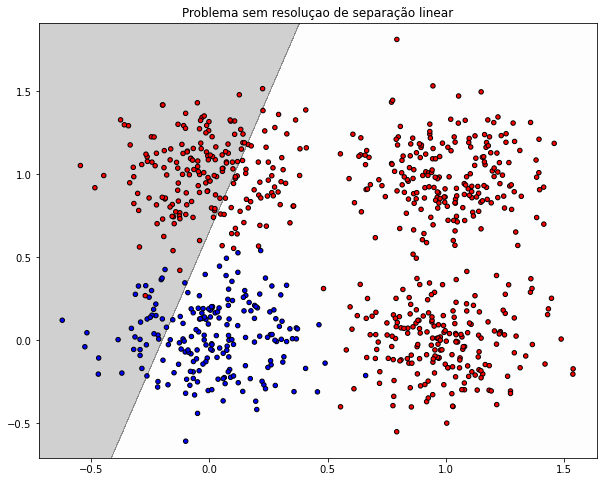

In [144]:
#Evidenciando que este problema não é de uma separação linear
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.001),
                     np.arange(y_min, y_max, 0.001))

f, axarr = plt.subplots(1, 1, sharex='col', sharey='row', figsize=(10, 8))
color = np.where(y == 0, 'r', 'b')

for idx, clf, tt in zip([[0,0]],
                        [n],
                        ['Problema sem resoluçao de separação linear']):

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = np.array(Z)
    Z = Z.reshape(xx.shape)

    axarr.contourf(xx, yy, Z, alpha=0.2,cmap='Greys')
    axarr.scatter(X[:, 0], X[:, 1], c=color, s=20, edgecolor='k',cmap='Greys')
    axarr.set_title(tt)
plt.show()

In [150]:
np.random.seed(0)
msk = np.random.rand(len(dataHoldout)) < 0.7
train = dataHoldout[msk]
test = dataHoldout[~msk]
XTrain = train[...,0:2]
XTest = test[...,0:2]
yTrain = train[...,2]
yTest = test[...,2]

n.run100epochs(XTrain, yTrain)

ValueError: operands could not be broadcast together with shapes (2,) (3,) 